In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('heart.csv')

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

<Axes: xlabel='HeartDisease'>

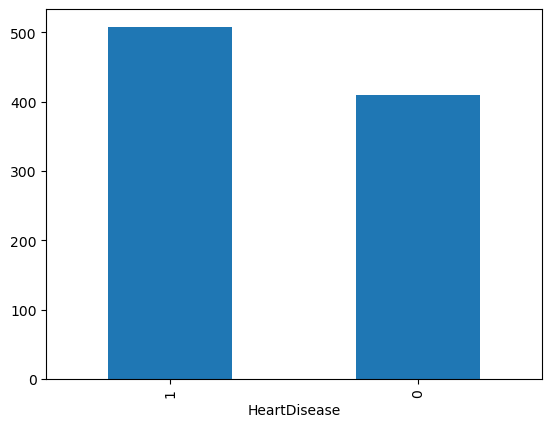

In [8]:
df['HeartDisease'].value_counts().plot(kind='bar')

In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

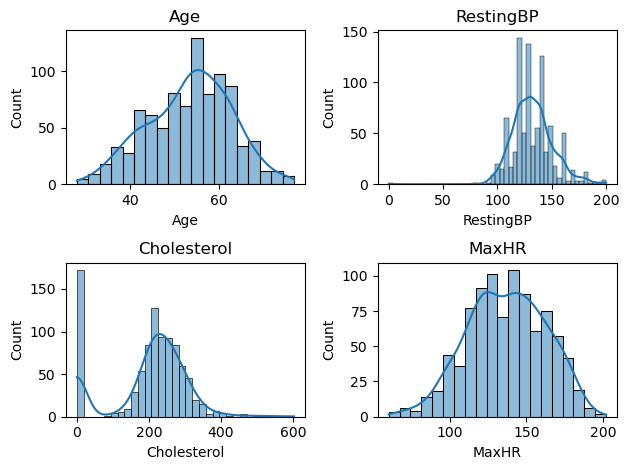

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotting(var, num):
    plt.subplot(2, 2, num)   
    sns.histplot(df[var], kde=True)
    plt.title(var)

plotting('Age', 1)
plotting('RestingBP', 2)
plotting('Cholesterol', 3)
plotting('MaxHR', 4)

plt.tight_layout()
plt.show()


In [11]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [12]:
ch_mean= df.loc[df['Cholesterol'] != 0,'Cholesterol'].mean()

In [13]:
ch_mean

np.float64(244.6353887399464)

In [14]:
df['Cholesterol'] = df['Cholesterol'].replace(0,ch_mean)
df['Cholesterol'] = df['Cholesterol'].round(2)

In [15]:
df['Cholesterol'].value_counts()

Cholesterol
244.64    172
254.00     11
220.00     10
223.00     10
204.00      9
         ... 
353.00      1
278.00      1
157.00      1
176.00      1
131.00      1
Name: count, Length: 222, dtype: int64

In [16]:
restingbp_mean= df.loc[df['RestingBP'] != 0,'RestingBP'].mean()
df['RestingBP'] = df['RestingBP'].replace(0,restingbp_mean)
df['RestingBP'] = df['RestingBP'].round(2)

In [17]:
df['RestingBP'].value_counts()

RestingBP
120.0    132
130.0    118
140.0    107
110.0     58
150.0     55
        ... 
101.0      1
117.0      1
192.0      1
129.0      1
164.0      1
Name: count, Length: 67, dtype: int64

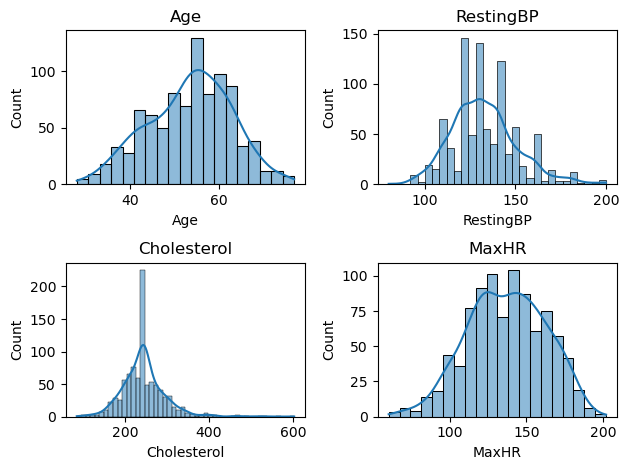

In [18]:
def plotting(var, num):
    plt.subplot(2, 2, num)   
    sns.histplot(df[var], kde=True)
    plt.title(var)

plotting('Age', 1)
plotting('RestingBP', 2)
plotting('Cholesterol', 3)
plotting('MaxHR', 4)

plt.tight_layout()
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

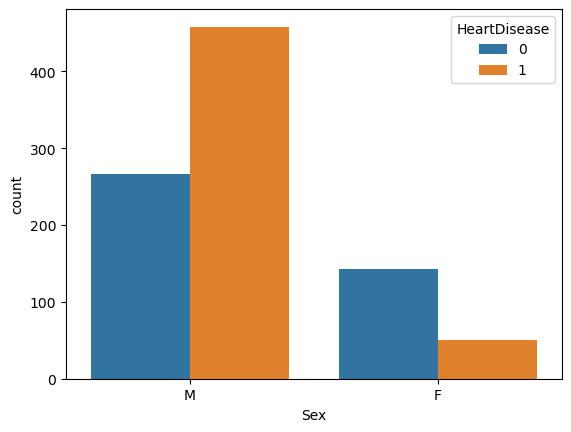

In [19]:
sns.countplot(x=df['Sex'],hue=df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

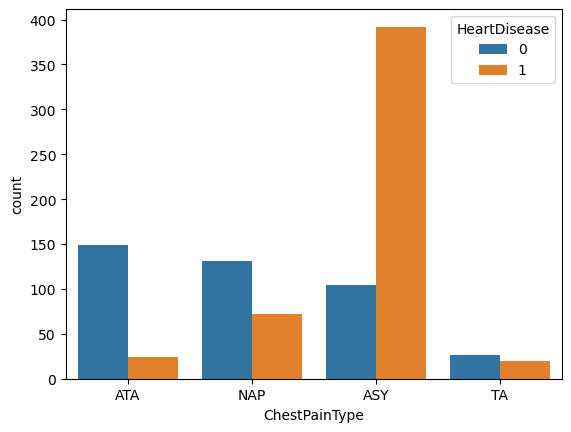

In [20]:
sns.countplot(x=df['ChestPainType'],hue= df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

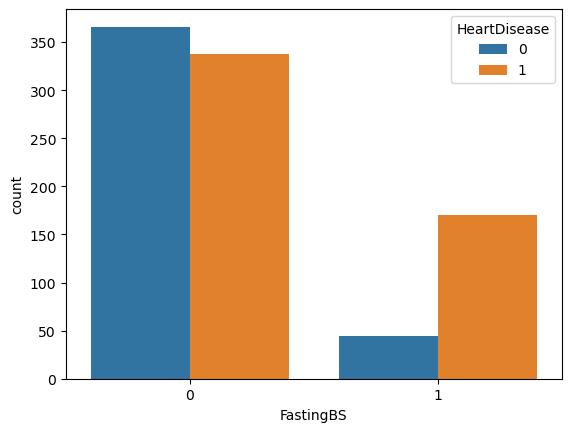

In [21]:
sns.countplot(x=df['FastingBS'],hue= df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

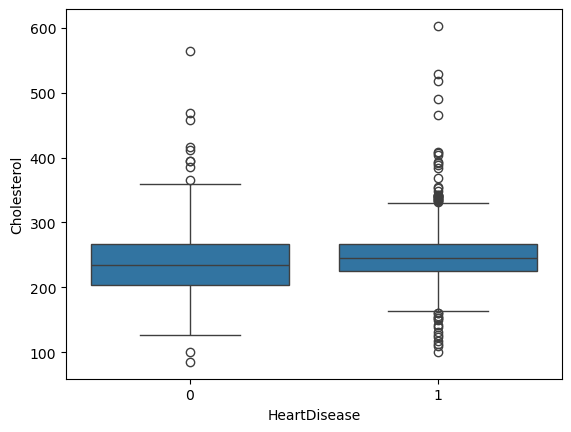

In [22]:
sns.boxplot(data=df,y='Cholesterol',x='HeartDisease' )

<Axes: xlabel='HeartDisease', ylabel='Age'>

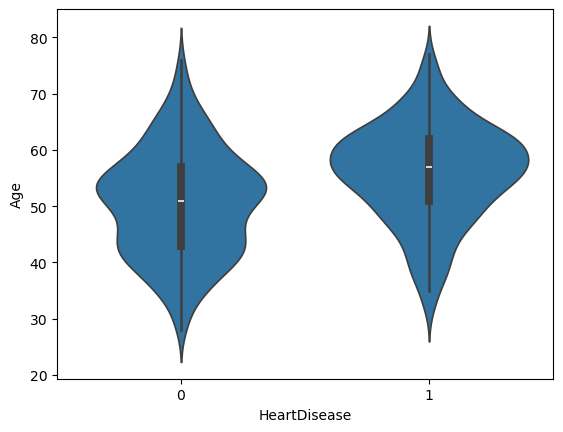

In [23]:
sns.violinplot(x='HeartDisease',y='Age',data=df)

<Axes: >

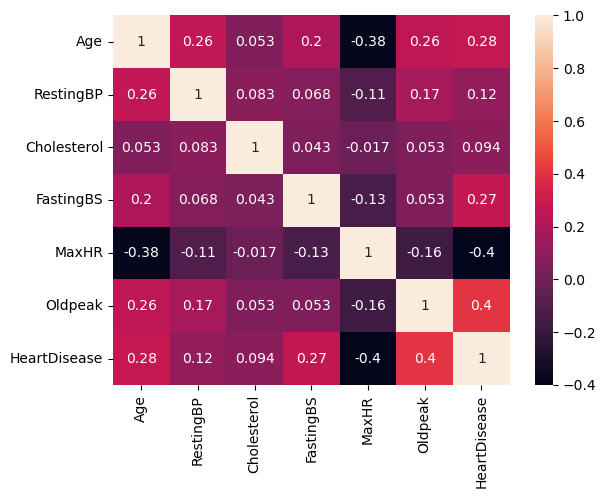

In [24]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [25]:
#Data Preprocessing and Data Cleaning

In [26]:
df_encode = pd.get_dummies(df,drop_first=True)
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler= StandardScaler()

In [29]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [30]:
numerical_cols=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
df_encode[numerical_cols]= scaler.fit_transform(df_encode[numerical_cols])

In [31]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414853,0.832513,0,1.382928,-0.832432,0,True,True,False,False,True,False,False,False,True
1,-0.478484,1.527192,-1.212938,0,0.754157,0.105664,1,False,False,True,False,True,False,False,True,False
2,-1.751359,-0.141317,0.719919,0,-1.525138,-0.832432,0,True,True,False,False,False,True,False,False,True
3,-0.584556,0.303619,-0.574908,0,-1.132156,0.574711,1,False,False,False,False,True,False,True,True,False
4,0.051881,0.971022,-0.931454,0,-0.581981,-0.832432,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.253656,0.363372,0,-0.188999,0.293283,1,True,False,False,True,True,False,False,True,False
914,1.536902,0.637321,-0.968986,1,0.164684,2.357094,1,True,False,False,False,True,False,False,True,False
915,0.370100,-0.141317,-2.132453,0,-0.857069,0.293283,1,True,False,False,False,True,False,True,True,False
916,0.370100,-0.141317,-0.162065,0,1.461525,-0.832432,1,False,True,False,False,False,False,False,True,False


In [32]:
df_encode.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [34]:
X= df_encode.drop('HeartDisease',axis=1)
y=df_encode['HeartDisease']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.20, random_state=42)

In [36]:
X_scaled_train= scaler.fit_transform(X_train)
X_scaled_test= scaler.fit_transform(X_test)

In [37]:
#now seeing all the model

In [38]:
models ={
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Naive Bayes":GaussianNB(),
    "Decision tree":DecisionTreeClassifier(),
    "SVM":SVC()
}

In [39]:
result =[]

In [40]:
for name,model in models.items():
    model.fit(X_scaled_train,y_train)
    y_pred = model.predict(X_scaled_test)
    acc= accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    result.append({
        'model':name,
        'Accuracy':round(acc,4),
        "f1-Score":round(f1,4)
    })
    

In [41]:
result

[{'model': 'Logistic Regression', 'Accuracy': 0.8641, 'f1-Score': 0.8804},
 {'model': 'KNN', 'Accuracy': 0.8533, 'f1-Score': 0.8708},
 {'model': 'Naive Bayes', 'Accuracy': 0.8533, 'f1-Score': 0.8683},
 {'model': 'Decision tree', 'Accuracy': 0.7826, 'f1-Score': 0.8077},
 {'model': 'SVM', 'Accuracy': 0.8478, 'f1-Score': 0.8679}]

In [43]:
import joblib
joblib.dump(models['KNN'],'KNN_heart.pkl')
joblib.dump(scaler,'Scaler.pkl')
joblib.dump(X.columns.tolist(),'columns.pkl')

['columns.pkl']